<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema2_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualización de datos: Creando gráficos de calidad

### Indicadores principales de coyuntura de los países de la Unión Europea

En este notebook vamos a descargar de [EUROSTAT](https://ec.europa.eu/eurostat/web/main/data/database) datos de PIB y paro para los países de la UE y a representarlos en gráficos de calidad.

*Daniel Oto-Peralías*

### Importar librerías

In [1]:
# IMPORTAMOS LIBRERIAS
import pandas as pd
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt

### Importamos y procesamos los datos

#### PIB en volúmen

In [ ]:
# PIB en volúmen (Gross domestic product, volumes (teina011))
link_pib="https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/teina011.tsv.gz"
pib = pd.read_csv(link_pib, compression='gzip', header=0, sep='\t')
pib # En el excel de EUROSTAT podemos comprobar que son tablas equivalentes.

Vamos a hacer el siguiente procesamiento a los datos:
1. Dividimos la columna ```na_item,unit,geo\time``` en tres columnas.
2. Seleccionamos solo la unidad "PCH_Q1_SCA" que significa "Percentage change, Annual variation rate, Seasonally and Calendar Adjusted.
3. Borramos los valores "p" y los ":".
4. Transponemos la tabla.
5. Usamos los nombres de países como nombre de las columnas.
6. Convertimos las columnas en formato numérico.
7. Establecemos el index de la tabla como fecha.


In [ ]:
# 1. Dividimos la columna en tres.
# Hay que separar por la coma=> Es fácil porque las posiciones de las comas son fijas en este caso.
pib['na_item']=pib['na_item,unit,geo\\time'].str[:4] # Nótese el uso de la doble barra (!)
pib['unit']=pib['na_item,unit,geo\\time'].str[5:15]
pib['geo']=pib['na_item,unit,geo\\time'].str[16:]
pib.drop(columns='na_item,unit,geo\\time',inplace=True)
pib

In [ ]:
# 2. Seleccionamos solo la variable PCH_Q4_SCA
pib=pib.loc[pib['unit']=="PCH_Q4_SCA"]
pib

In [ ]:
# 3. Borramos los valores p y los :
for col in pib.columns:
  pib[col]=pib[col].replace("p","",regex=True) # Dejamos espacio adelante porque dicho espacio existe en los datos.
  pib[col]=pib[col].replace(":","",regex=True)
  pib[col]=pib[col].replace(" ","",regex=True) # por si hay algún espacio
pib

In [ ]:
# 4. Transponemos la tabla
pib=pib.transpose()
pib

In [ ]:
# 5. Usamos la fila de nombres de países como nombres de las columnas
nombre_col = pib.iloc[-1] # Los nombres de países están en la última fila
pib = pib.iloc[:-3] # aplicamos un filtrado para quitar las tres últimas filas
pib.columns = nombre_col # Establecemos el nuevo nombre de las columnas
pib

In [ ]:
# 6. Convertimos las columnas en formato numérico.
for col in pib.columns:
  pib[col]=pd.to_numeric(pib[col], errors='coerce')
pib

In [ ]:
#7. Establecemos el index de la tabla como fecha
pib.index=pib.index.str.replace(" ","",regex=True)
pib.index=pd.to_datetime(pib.index)
pib

#### Tasa de desempleo

In [ ]:
# Tasa de desempleo (Total unemployment rate (tps00203))
link_des="https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/une_rt_q.tsv.gz"
tp = pd.read_csv(link_des, compression='gzip', header=0, sep='\t')
tp

In [ ]:
# 1. Dividimos la columna en tres.
# Hay que separar por la coma=> Ojo, ahora es un poco más difícil
columna='s_adj,age,unit,sex,geo\\time'
tp['s_adj']=tp[columna].str.split(",").str[0]
tp['age']=tp[columna].str.split(",").str[1]
tp['unit']=tp[columna].str.split(",").str[2]
tp['sex']=tp[columna].str.split(",").str[3]
tp['geo']=tp[columna].str.split(",").str[4]
tp.drop(columns=columna,inplace=True)
tp

In [ ]:
# Exploramos un poco los datos
tp.unit.value_counts()


In [ ]:
# 2. Seleccionamos SA, Y15-74, PC_ACT, T
tp=tp.loc[(tp['s_adj']=="SA") &
          (tp['age']=="Y15-74") &
          (tp['unit']=="PC_ACT") &
          (tp['sex']=="T")]
tp

In [ ]:
# 3. Borramos los valores p y los :
for col in tp.columns:
  for c in ["p","d","u","b",":"," "]:
    tp[col]=tp[col].replace(c,"",regex=True)
tp

In [ ]:
# 4. Transponemos la tabla
tp=tp.transpose()
tp

In [ ]:
# 5. Usamos la fila de nombres de países como nombres de las columnas
nombre_col = tp.iloc[-1] # Los nombres de países están en la última fila
tp = tp.iloc[:-5] # aplicamos un filtrado para quitar las tres últimas filas
tp.columns = nombre_col # Establecemos el nuevo nombre de las columnas

# 6. Convertimos las columnas en formato numérico.
for col in tp.columns:
  tp[col]=pd.to_numeric(tp[col], errors='coerce')

#7. Establecemos el index de la tabla como fecha
tp.index=tp.index.str.replace(" ","",regex=True)
tp.index=pd.to_datetime(tp.index)
tp.sort_index(inplace=True)

#8. Filtramos por fecha, con fecha inicio igual a tabla del PIB
tp=tp.loc["2020-07":]

tp

### Gráficos exploratorios: dibujamos directamente desde **pandas**

* Importante: esto solo vale como gráficos exploratorios para uso personal.
* Para otros propósitos, hay que preparar gráficos de más calidad.

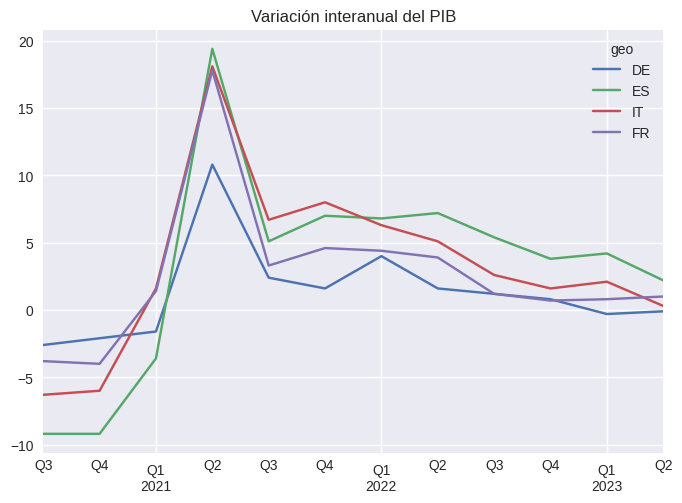

In [104]:
# Tasa de variación del PIB para una selección de países
paises=['DE','ES','IT','FR']
pib[paises].plot(title="Variación interanual del PIB")
plt.show()

In [ ]:
# Grafico de barras para media del periodo
pib_med=pib.mean()
pib_med[paises].plot(kind="bar",title="Crecimiento trimestral medio desde T3 2020")
plt.show()

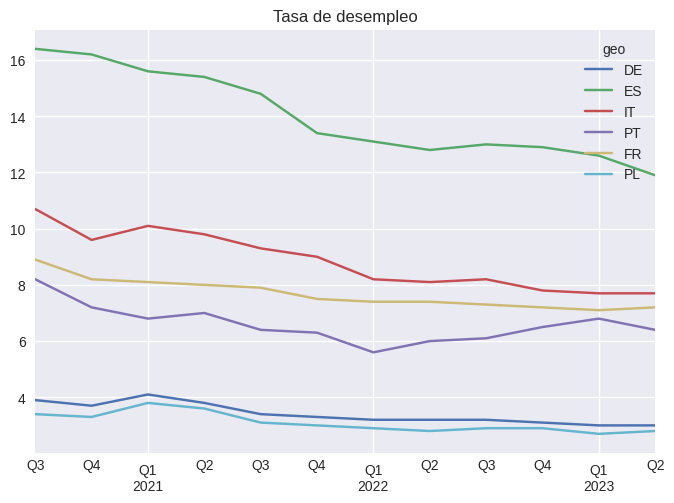

In [81]:
# Tasa de desempleo
tp[paises].plot(title="Tasa de desempleo")
plt.show()

In [ ]:
# Grafico de barras para media del periodo
tp_med=tp.mean()
tp_med[paises].plot(kind="bar",title="Tasa de paro promedio desde T3 2020")
plt.show()

### Gráficos de calidad (para informes, trabajos, artículos, etc.)

Matplotlib permite usar diferentes estilos predeterminados:
https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

Echamos un vistazo y elegimos uno que nos guste.


In [37]:
plt.style.use('seaborn-v0_8')

#### Figura 1: Tasa de variación intertrimestral del PIB en España

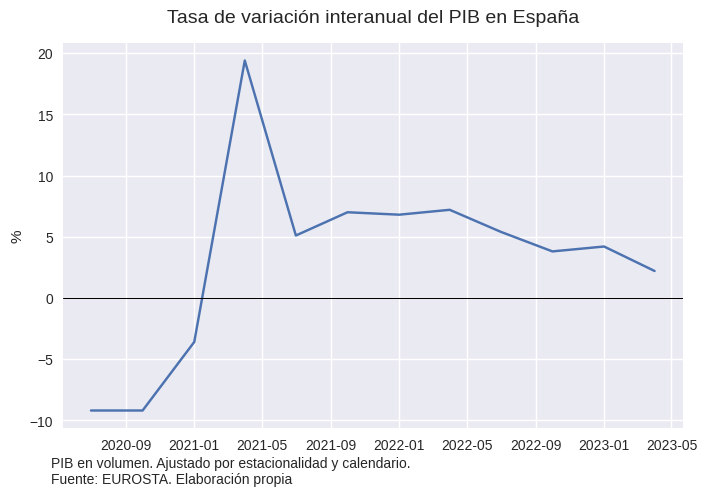

In [102]:
fig, ax=plt.subplots(figsize=(8,5),dpi=100)
ax.plot(pib['ES']) # Equivalente: pib['ES'].plot(ax=ax)
ax.set_ylabel("%")
ax.set_xlabel("")
ax.axhline(y=0, linewidth=0.75, color="black")
ax.set_title("Tasa de variación interanual del PIB en España", size=14, pad=15)
fig.text(0.11,0,"PIB en volumen. Ajustado por estacionalidad y calendario.\nFuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()

#### Figura 2: Tasa de variación intertrimestral del PIB en varios países

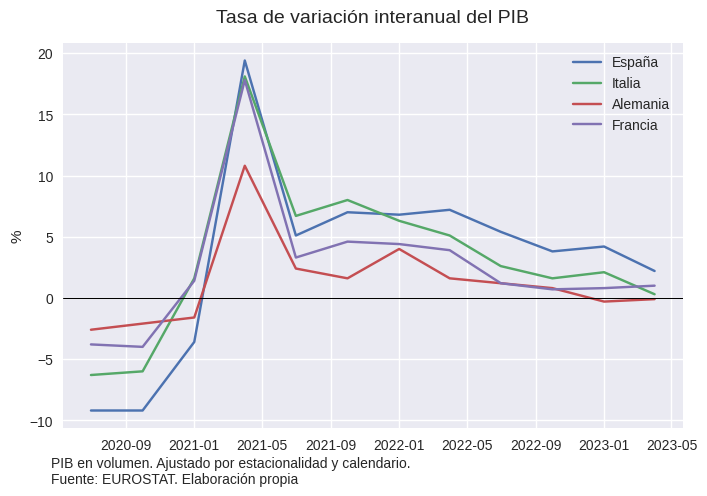

In [108]:
fig, ax=plt.subplots(figsize=(8,5),dpi=100)
ax.plot(pib['ES'],label="España")
ax.plot(pib['IT'],label="Italia")
ax.plot(pib['DE'],label="Alemania")
ax.plot(pib['FR'],label="Francia")
ax.set_ylabel("%")
ax.set_xlabel("")
ax.axhline(y=0, linewidth=0.75, color="black")
ax.set_title("Tasa de variación interanual del PIB", size=14, pad=15)
ax.legend()
fig.text(0.11,0,"PIB en volumen. Ajustado por estacionalidad y calendario.\nFuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()

#### Figura 2: Tasa de crecimiento medio del PIB desde T3 2020

In [ ]:
fig,ax=plt.subplots(figsize=(8,4),dpi=100)
tp_med[paises].plot.bar(xlabel="", ax=ax)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["Alemania", "España","Italia","Francia"], rotation='horizontal')
ax.set_title("Tasa de crecimiento medio del PIB interanual desde el \n tercer trimestre de 2020", size=14, pad=15)
fig.text(0.12,-0.05,"PIB en volumen. Ajustado por estacionalidad y calendario.\nFuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()

#### Figura 3: Tasa de crecimiento del PIB y tasa de desempleo

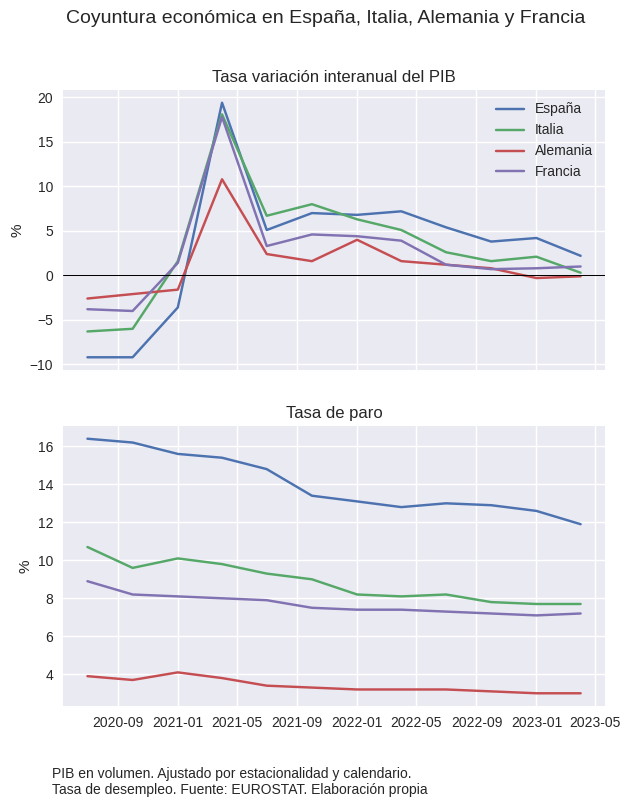

In [133]:
fig, (ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(7,8),dpi=100)
# Axes ax1
ax1.plot(pib['ES'],label="España")
ax1.plot(pib['IT'],label="Italia")
ax1.plot(pib['DE'],label="Alemania")
ax1.plot(pib['FR'],label="Francia")
ax1.set_ylabel("%")
ax1.axhline(y=0, linewidth=0.75, color="black")
ax1.set_title("Tasa variación interanual del PIB")
ax1.legend()
# Axes ax2
ax2.plot(tp['ES'],label="España")
ax2.plot(tp['IT'],label="Italia")
ax2.plot(tp['DE'],label="Alemania")
ax2.plot(tp['FR'],label="Francia")
ax2.set_ylabel("%")
ax2.set_title("Tasa de paro")
ax2.set_xlabel("")
# Toda la figura
fig.suptitle("Coyuntura económica en España, Italia, Alemania y Francia", size=14)
fig.text(0.11,0,"PIB en volumen. Ajustado por estacionalidad y calendario.\nTasa de desempleo. Fuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()


Los códigos de países de EUROSTAT están disponibles aquí:  
https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes

### Material adicional:

Para más ejemplos de gráficos, usando otros datos, véase este notebook del curso 2022-2023:
[Visualización de datos: Creando gráficos de calidad (curso 2022-2023)](https://github.com/otoperalias/Coyuntura/blob/_2022/clases/Tema2_Visualizacion.ipynb)